# Support Vector Regression (SVR)

### Data Preprocessing

In [72]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.svm import SVR # For SVR
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

In [73]:
# Feature Scaling
# This is needed in SVR as python SVR class does not includes feature scaling in it's algorithm 
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

/home/baka/Programs/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [74]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [75]:
y = y[:, 0] # We need to suppy a 1-d array in regressor.fit(). So it's better to convert y in an 1-d array

In [76]:
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

### Fitting the SVR Model to the dataset

In [77]:
regressor = SVR()
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting a new result

In [79]:
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([ 170370.0204065])

### Visualising the Regression results

Text(0,0.5,'Salary')

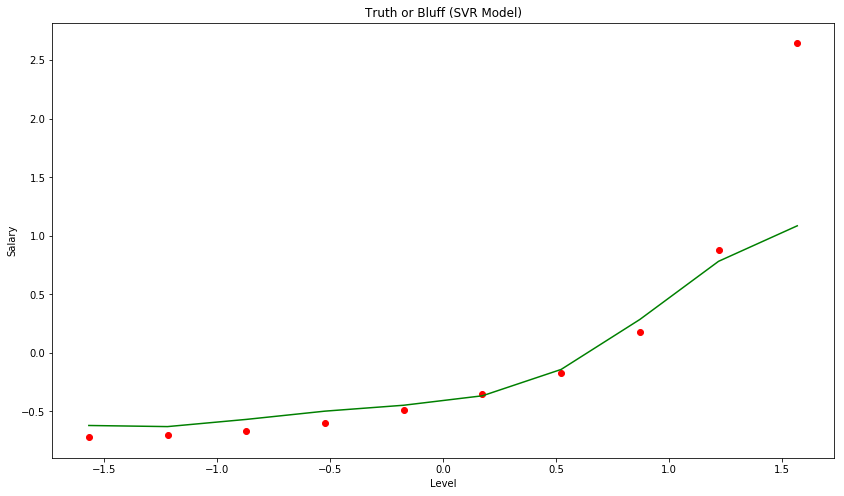

In [80]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Level')
plt.ylabel('Salary')

### More continuous visualization

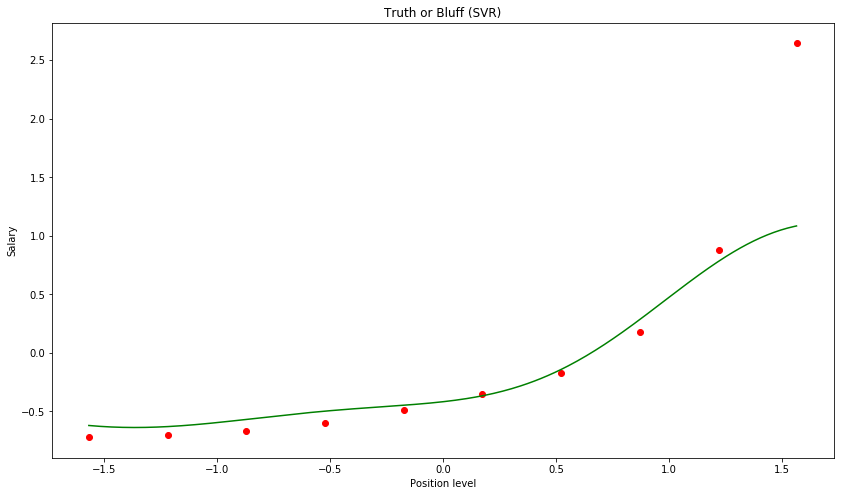

In [81]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


* * *

**The observation point for CEO is considered as an outlier. This is because the CEO has a much higher Salary then the other Level**

* * *
